# 📊 Dashboard Executivo - Pastelaria Vinny Navegantes

## 🎯 Análise Completa de Performance e Vendas

Este notebook apresenta uma análise executiva completa das transações da **Pastelaria Vinny Navegantes**, fornecendo insights estratégicos para tomada de decisão e otimização do negócio.

---

### 📋 **ESTRUTURA DO RELATÓRIO:**

1. **🔧 Configuração e Setup**
2. **📥 Carregamento de Dados**  
3. **🧹 Limpeza e Processamento**
4. **📊 Análise Descritiva Geral**
5. **⏰ Análise Temporal**
6. **💳 Análise por Método de Pagamento**
7. **📈 Análise Comparativa Multi-Mensal**
8. **📅 Análise por Dia da Semana**
9. **💰 KPIs e Métricas Executivas**
10. **🎯 Insights e Recomendações**

---

### 📈 **DADOS DISPONÍVEIS:**
- **PIX:** Transações digitais instantâneas
- **Crédito:** Transações com cartão de crédito
- **Débito:** Transações com cartão de débito

### 📆 **PERÍODOS ANALISADOS:**
- **Agosto 2025** - Dados completos
- **Setembro 2025** - Dados completos
- **Sistema preparado para expansão mensal**

---

### 🎨 **RECURSOS DO DASHBOARD:**
- ✅ Visualizações interativas e profissionais
- ✅ KPIs executivos automatizados
- ✅ Comparações temporais inteligentes  
- ✅ Insights estratégicos baseados em dados
- ✅ Sistema modular para crescimento

---

*🔄 Última atualização: 29 de outubro de 2025*
*💡 Sistema de análise desenvolvido especialmente para Pastelaria Vinny*

In [82]:
# =========================================================================
# 🔧 1. CONFIGURAÇÃO E SETUP DO AMBIENTE
# =========================================================================

# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from pathlib import Path
import warnings

# Configurações globais
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Configurações de visualização profissionais
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Configurações brasileiras
import locale
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil.1252')

print("✅ AMBIENTE CONFIGURADO COM SUCESSO!")
print("=" * 50)
print(f"🕐 Data/Hora da análise: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"🐍 Python: {pd.__version__}")
print(f"📊 Pandas: {pd.__version__}")
print(f"📈 Matplotlib: {plt.matplotlib.__version__}")
print("🎯 Dashboard pronto para análise executiva!")

✅ AMBIENTE CONFIGURADO COM SUCESSO!
🕐 Data/Hora da análise: 29/10/2025 21:15:59
🐍 Python: 2.3.3
📊 Pandas: 2.3.3
📈 Matplotlib: 3.10.6
🎯 Dashboard pronto para análise executiva!


# 📥 2. CARREGAMENTO E ESTRUTURAÇÃO DOS DADOS

Sistema inteligente de carregamento multi-mensal com validação automática e tratamento de erros.

In [83]:
# =========================================================================
# 📥 2. CARREGAMENTO INTELIGENTE DE DADOS MULTI-MENSAL
# =========================================================================

# Configuração de meses disponíveis - Sistema modular para crescimento
MESES_DISPONIVEIS = {
    'setembro': '../outputs/reports/setembro',
    'agosto': '../outputs/reports/agosto',
}

def carregar_dados_mes(mes, caminho_base):
    """
    Carrega dados de um mês específico com validação completa
    
    Args:
        mes: Nome do mês (string)
        caminho_base: Caminho base dos arquivos
    
    Returns:
        dict: Dicionário com DataFrames por método de pagamento
    """
    dados_mes = {'pix': pd.DataFrame(), 'credito': pd.DataFrame(), 'debito': pd.DataFrame()}
    
    # Mapeamento de arquivos por método - Sistema flexível
    if mes == 'setembro':
        arquivos = {
            'pix': 'transacoes_pix.csv',
            'credito': 'transacoes_credito.csv', 
            'debito': 'transacoes_debito.csv'
        }
    else:  # Para agosto e outros meses com estrutura de subpastas
        arquivos = {
            'pix': 'pix/transacoes_consolidadas.csv',
            'credito': 'credito/transacoes_consolidadas.csv', 
            'debito': 'debito/transacoes_consolidadas.csv'
        }
    
    print(f"🔄 Carregando dados de {mes.upper()}...")
    
    for metodo, arquivo in arquivos.items():
        caminho = Path(caminho_base) / arquivo
        
        try:
            if caminho.exists():
                # Usar separador de ponto e vírgula para os CSVs brasileiros
                df = pd.read_csv(caminho, sep=';')
                dados_mes[metodo] = df
                print(f"   ✅ {metodo.upper()}: {len(df)} transações carregadas")
            else:
                print(f"   ⚠️  {metodo.upper()}: Arquivo não encontrado - {caminho}")
                
        except Exception as e:
            print(f"   ❌ Erro ao carregar {metodo}: {e}")
    
    return dados_mes

# Carregamento automático de todos os meses disponíveis
print("🚀 INICIANDO CARREGAMENTO MULTI-MENSAL")
print("=" * 60)

todos_os_dados = {}
for mes, caminho in MESES_DISPONIVEIS.items():
    todos_os_dados[mes] = carregar_dados_mes(mes, caminho)

print(f"\n✅ CARREGAMENTO CONCLUÍDO!")
print(f"📊 Meses processados: {list(todos_os_dados.keys())}")
print(f"🎯 Sistema pronto para análise multi-temporal!")

🚀 INICIANDO CARREGAMENTO MULTI-MENSAL
🔄 Carregando dados de SETEMBRO...
   ✅ PIX: 354 transações carregadas
   ✅ CREDITO: 184 transações carregadas
   ✅ DEBITO: 167 transações carregadas
🔄 Carregando dados de AGOSTO...
   ✅ PIX: 427 transações carregadas
   ✅ CREDITO: 171 transações carregadas
   ✅ DEBITO: 264 transações carregadas

✅ CARREGAMENTO CONCLUÍDO!
📊 Meses processados: ['setembro', 'agosto']
🎯 Sistema pronto para análise multi-temporal!


In [84]:
# =========================================================================
# 🧹 3. LIMPEZA E PADRONIZAÇÃO DOS DADOS
# =========================================================================

def limpar_valor(valor_str):
    """
    Converte string de valor monetário para float
    
    Args:
        valor_str: String com valor (ex: 'R$ 15,30')
    
    Returns:
        float: Valor numérico ou 0.0 se inválido
    """
    if pd.isna(valor_str):
        return 0.0
    
    try:
        # Remove símbolos e espaços, substitui vírgula por ponto
        valor_limpo = str(valor_str).replace('R$', '').replace(' ', '').replace(',', '.')
        return float(valor_limpo)
    except:
        return 0.0

def padronizar_dados(df, tipo_pagamento, mes):
    """
    Padroniza DataFrame com validação completa e enriquecimento temporal
    
    Args:
        df: DataFrame original
        tipo_pagamento: Tipo de pagamento (PIX, Crédito, Débito)
        mes: Nome do mês
    
    Returns:
        DataFrame: Dados padronizados e enriquecidos
    """
    if df.empty:
        print(f"   ⚠️ DataFrame vazio para {tipo_pagamento}")
        return pd.DataFrame()
    
    # Criar cópia para preservar original
    df_clean = df.copy()
    
    # Adicionar metadados
    df_clean['Metodo_Pagamento'] = tipo_pagamento
    df_clean['Mes'] = mes.capitalize()
    
    # Limpeza e conversão de valores
    if 'Valor' in df_clean.columns:
        df_clean['Valor'] = df_clean['Valor'].apply(limpar_valor)
    else:
        df_clean['Valor'] = 0.0
    
    # Processamento temporal avançado
    if 'Data' in df_clean.columns and 'Hora' in df_clean.columns:
        try:
            # Combinar Data e Hora em uma única coluna datetime
            df_clean['Data_Hora'] = pd.to_datetime(df_clean['Data'] + ' ' + df_clean['Hora'].astype(str), 
                                                  format='%d/%m/%Y %H:%M', errors='coerce')
            
            # Extrações temporais detalhadas  
            df_clean['Data_Clean'] = df_clean['Data_Hora'].dt.date
            df_clean['Hora_Int'] = df_clean['Data_Hora'].dt.hour
            df_clean['Minuto'] = df_clean['Data_Hora'].dt.minute
            df_clean['Dia_Semana'] = df_clean['Data_Hora'].dt.day_name()
            df_clean['Dia_Mes'] = df_clean['Data_Hora'].dt.day
            df_clean['Periodo_Dia'] = df_clean['Hora_Int'].apply(classificar_periodo)
            
        except Exception as e:
            print(f"   ⚠️ Erro no processamento temporal para {tipo_pagamento}: {e}")
    elif 'Data_Hora' in df_clean.columns:
        try:
            df_clean['Data_Hora'] = pd.to_datetime(df_clean['Data_Hora'], errors='coerce')
            
            # Extrações temporais detalhadas
            df_clean['Data_Clean'] = df_clean['Data_Hora'].dt.date
            df_clean['Hora_Int'] = df_clean['Data_Hora'].dt.hour
            df_clean['Minuto'] = df_clean['Data_Hora'].dt.minute
            df_clean['Dia_Semana'] = df_clean['Data_Hora'].dt.day_name()
            df_clean['Dia_Mes'] = df_clean['Data_Hora'].dt.day
            df_clean['Periodo_Dia'] = df_clean['Hora_Int'].apply(classificar_periodo)
            
        except Exception as e:
            print(f"   ⚠️ Erro no processamento temporal para {tipo_pagamento}: {e}")
    
    # Validações de qualidade
    valores_validos = (df_clean['Valor'] > 0) & (df_clean['Valor'] < 1000)
    df_clean = df_clean[valores_validos]
    
    return df_clean

def classificar_periodo(hora):
    """Classifica hora em período do dia"""
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'

# Processamento e padronização de todos os dados
print("🧹 INICIANDO LIMPEZA E PADRONIZAÇÃO")
print("=" * 60)

dados_processados = {}

for mes, dados_mes in todos_os_dados.items():
    print(f"\n📅 Processando {mes.upper()}:")
    
    # Padronizar cada método de pagamento
    pix_clean = padronizar_dados(dados_mes['pix'], 'PIX', mes)
    credito_clean = padronizar_dados(dados_mes['credito'], 'Crédito', mes)  
    debito_clean = padronizar_dados(dados_mes['debito'], 'Débito', mes)
    
    # Consolidar dados do mês
    df_mes = pd.concat([pix_clean, credito_clean, debito_clean], ignore_index=True)
    dados_processados[mes] = df_mes
    
    print(f"   📊 Total processado: {len(df_mes)} transações")
    print(f"   💰 Faturamento: R$ {df_mes['Valor'].sum():,.2f}")
    print(f"   🎫 Ticket médio: R$ {df_mes['Valor'].mean():.2f}")

print(f"\n✅ LIMPEZA CONCLUÍDA!")
print(f"🎯 Dados prontos para análise executiva!")

# Consolidar TODOS os dados para análises gerais
df_completo_todos = pd.concat(dados_processados.values(), ignore_index=True)
print(f"\n📈 DATASET CONSOLIDADO CRIADO:")
print(f"   🏪 Total de transações: {len(df_completo_todos):,}")
print(f"   💰 Faturamento total: R$ {df_completo_todos['Valor'].sum():,.2f}")

🧹 INICIANDO LIMPEZA E PADRONIZAÇÃO

📅 Processando SETEMBRO:


   📊 Total processado: 705 transações
   💰 Faturamento: R$ 11,251.19
   🎫 Ticket médio: R$ 15.96

📅 Processando AGOSTO:
   📊 Total processado: 862 transações
   💰 Faturamento: R$ 14,426.72
   🎫 Ticket médio: R$ 16.74

✅ LIMPEZA CONCLUÍDA!
🎯 Dados prontos para análise executiva!

📈 DATASET CONSOLIDADO CRIADO:
   🏪 Total de transações: 1,567
   💰 Faturamento total: R$ 25,677.91
   📊 Total processado: 862 transações
   💰 Faturamento: R$ 14,426.72
   🎫 Ticket médio: R$ 16.74

✅ LIMPEZA CONCLUÍDA!
🎯 Dados prontos para análise executiva!

📈 DATASET CONSOLIDADO CRIADO:
   🏪 Total de transações: 1,567
   💰 Faturamento total: R$ 25,677.91


# 📊 4. ANÁLISE DESCRITIVA EXECUTIVA

Visão geral consolidada com estatísticas descritivas e métricas de performance por mês e método de pagamento.

## 📈 Estatísticas Gerais Multi-Mensal

In [85]:
# =========================================================================
# 📊 4. ANÁLISE DESCRITIVA EXECUTIVA - ESTATÍSTICAS CONSOLIDADAS
# =========================================================================

def gerar_estatisticas_executivas():
    """Gera relatório executivo com estatísticas consolidadas"""
    
    print("📊 RELATÓRIO EXECUTIVO - ESTATÍSTICAS GERAIS")
    print("=" * 70)
    
    # Estatísticas globais consolidadas
    total_transacoes = len(df_completo_todos)
    faturamento_total = df_completo_todos['Valor'].sum()
    ticket_medio_global = df_completo_todos['Valor'].mean()
    
    print(f"🏪 PERFORMANCE GERAL (TODOS OS MESES):")
    print(f"   📈 Total de transações: {total_transacoes:,}")
    print(f"   💰 Faturamento total: R$ {faturamento_total:,.2f}")
    print(f"   🎫 Ticket médio geral: R$ {ticket_medio_global:.2f}")
    print(f"   🏆 Maior venda: R$ {df_completo_todos['Valor'].max():.2f}")
    print(f"   📉 Menor venda: R$ {df_completo_todos['Valor'].min():.2f}")
    
    print(f"\n💳 PERFORMANCE POR MÉTODO DE PAGAMENTO:")
    stats_metodos = df_completo_todos.groupby('Metodo_Pagamento').agg({
        'Valor': ['count', 'sum', 'mean', 'max'],
    }).round(2)
    
    stats_metodos.columns = ['Qtd_Transacoes', 'Faturamento', 'Ticket_Medio', 'Maior_Venda']
    stats_metodos['Participacao_Qtd'] = (stats_metodos['Qtd_Transacoes'] / total_transacoes * 100).round(1)
    stats_metodos['Participacao_Valor'] = (stats_metodos['Faturamento'] / faturamento_total * 100).round(1)
    
    for metodo, stats in stats_metodos.iterrows():
        print(f"   🔸 {metodo}:")
        print(f"      • Transações: {stats['Qtd_Transacoes']:,} ({stats['Participacao_Qtd']:.1f}%)")
        print(f"      • Faturamento: R$ {stats['Faturamento']:,.2f} ({stats['Participacao_Valor']:.1f}%)")
        print(f"      • Ticket médio: R$ {stats['Ticket_Medio']:.2f}")
    
    print(f"\n📅 PERFORMANCE POR MÊS:")
    stats_mensal = df_completo_todos.groupby('Mes').agg({
        'Valor': ['count', 'sum', 'mean']
    }).round(2)
    
    stats_mensal.columns = ['Qtd_Transacoes', 'Faturamento', 'Ticket_Medio']
    
    for mes, stats in stats_mensal.iterrows():
        print(f"   📆 {mes}:")
        print(f"      • Transações: {stats['Qtd_Transacoes']:,}")
        print(f"      • Faturamento: R$ {stats['Faturamento']:,.2f}")
        print(f"      • Ticket médio: R$ {stats['Ticket_Medio']:.2f}")
    
    return stats_metodos, stats_mensal

# Gerar estatísticas executivas
stats_por_metodo, stats_por_mes = gerar_estatisticas_executivas()

print(f"\n✅ ANÁLISE DESCRITIVA COMPLETA!")
print(f"🎯 Dados consolidados e prontos para visualizações!")

📊 RELATÓRIO EXECUTIVO - ESTATÍSTICAS GERAIS
🏪 PERFORMANCE GERAL (TODOS OS MESES):
   📈 Total de transações: 1,567
   💰 Faturamento total: R$ 25,677.91
   🎫 Ticket médio geral: R$ 16.39
   🏆 Maior venda: R$ 128.00
   📉 Menor venda: R$ 1.00

💳 PERFORMANCE POR MÉTODO DE PAGAMENTO:
   🔸 Crédito:
      • Transações: 355.0 (22.7%)
      • Faturamento: R$ 6,756.71 (26.3%)
      • Ticket médio: R$ 19.03
   🔸 Débito:
      • Transações: 431.0 (27.5%)
      • Faturamento: R$ 6,812.79 (26.5%)
      • Ticket médio: R$ 15.81
   🔸 PIX:
      • Transações: 781.0 (49.8%)
      • Faturamento: R$ 12,108.41 (47.2%)
      • Ticket médio: R$ 15.50

📅 PERFORMANCE POR MÊS:
   📆 Agosto:
      • Transações: 862.0
      • Faturamento: R$ 14,426.72
      • Ticket médio: R$ 16.74
   📆 Setembro:
      • Transações: 705.0
      • Faturamento: R$ 11,251.19
      • Ticket médio: R$ 15.96

✅ ANÁLISE DESCRITIVA COMPLETA!
🎯 Dados consolidados e prontos para visualizações!


In [ ]:
# =========================================================================
# 🔍 INVESTIGAÇÃO: ANÁLISE DOS VALORES MAIS BAIXOS
# =========================================================================

print("🔍 INVESTIGANDO VALORES SUSPEITOS - MENOR VENDA R$ 0,30")
print("=" * 70)

# 1. Analisar estatísticas descritivas detalhadas dos valores
print("📊 ESTATÍSTICAS DESCRITIVAS DOS VALORES:")
print(df_completo_todos['Valor'].describe())

print(f"\n🔍 VALORES ÚNICOS MAIS BAIXOS (10 menores):")
valores_unicos_baixos = df_completo_todos['Valor'].nsmallest(10).unique()
for i, valor in enumerate(valores_unicos_baixos, 1):
    count = (df_completo_todos['Valor'] == valor).sum()
    print(f"   {i:2d}. R$ {valor:6.2f} - {count} ocorrências")

print(f"\n🎯 INVESTIGAÇÃO DETALHADA - TRANSAÇÕES COM VALORES BAIXOS (< R$ 5,00):")
valores_baixos = df_completo_todos[df_completo_todos['Valor'] < 5.0].copy()

if not valores_baixos.empty:
    print(f"   📊 Total de transações baixas: {len(valores_baixos)}")
    
    # Mostrar algumas amostras
    print(f"\n📋 AMOSTRA DE TRANSAÇÕES COM VALORES BAIXOS:")
    colunas_relevantes = ['Valor', 'Metodo_Pagamento', 'Mes', 'Data', 'Hora']
    colunas_existentes = [col for col in colunas_relevantes if col in valores_baixos.columns]
    
    for i, (idx, row) in enumerate(valores_baixos.head(10).iterrows()):
        print(f"   {i+1:2d}. ", end="")
        for col in colunas_existentes:
            print(f"{col}: {row[col]} | ", end="")
        print()
    
    # Distribuição por método de pagamento
    print(f"\n💳 DISTRIBUIÇÃO POR MÉTODO DE PAGAMENTO (valores < R$ 5,00):")
    dist_metodo = valores_baixos.groupby('Metodo_Pagamento').agg({
        'Valor': ['count', 'min', 'max', 'mean']
    }).round(2)
    dist_metodo.columns = ['Qtd', 'Min', 'Max', 'Media']
    print(dist_metodo)
    
    # Distribuição por mês
    print(f"\n📅 DISTRIBUIÇÃO POR MÊS (valores < R$ 5,00):")
    dist_mes = valores_baixos.groupby('Mes').agg({
        'Valor': ['count', 'min', 'max', 'mean']
    }).round(2)
    dist_mes.columns = ['Qtd', 'Min', 'Max', 'Media']
    print(dist_mes)
    
else:
    print("   ✅ Nenhuma transação encontrada com valores menores que R$ 5,00")

# 2. Verificar se há valores exatamente R$ 0,30
print(f"\n🎯 BUSCA ESPECÍFICA POR R$ 0,30:")
transacoes_030 = df_completo_todos[df_completo_todos['Valor'] == 0.30]

if not transacoes_030.empty:
    print(f"   ❗ ENCONTRADAS {len(transacoes_030)} transações de R$ 0,30!")
    print(f"\n📋 DETALHES DAS TRANSAÇÕES R$ 0,30:")
    
    for i, (idx, row) in enumerate(transacoes_030.iterrows()):
        print(f"   Transação {i+1}:")
        for col in transacoes_030.columns:
            if pd.notna(row[col]):
                print(f"      {col}: {row[col]}")
        print()
else:
    print("   ⚠️  Nenhuma transação encontrada com valor exato R$ 0,30")
    print("   🤔 Pode ser um erro de arredondamento ou conversão")

print(f"\n🔍 CONCLUSÃO DA INVESTIGAÇÃO:")
print(f"   • Menor valor real: R$ {df_completo_todos['Valor'].min():.2f}")
print(f"   • Valores abaixo de R$ 1,00: {(df_completo_todos['Valor'] < 1.0).sum()}")
print(f"   • Valores entre R$ 0,20 e R$ 0,40: {((df_completo_todos['Valor'] >= 0.20) & (df_completo_todos['Valor'] <= 0.40)).sum()}")
print(f"   • Possível causa: Erro na conversão de strings ou dados corrompidos")

⏰ GERANDO DASHBOARD TEMPORAL EXECUTIVO...


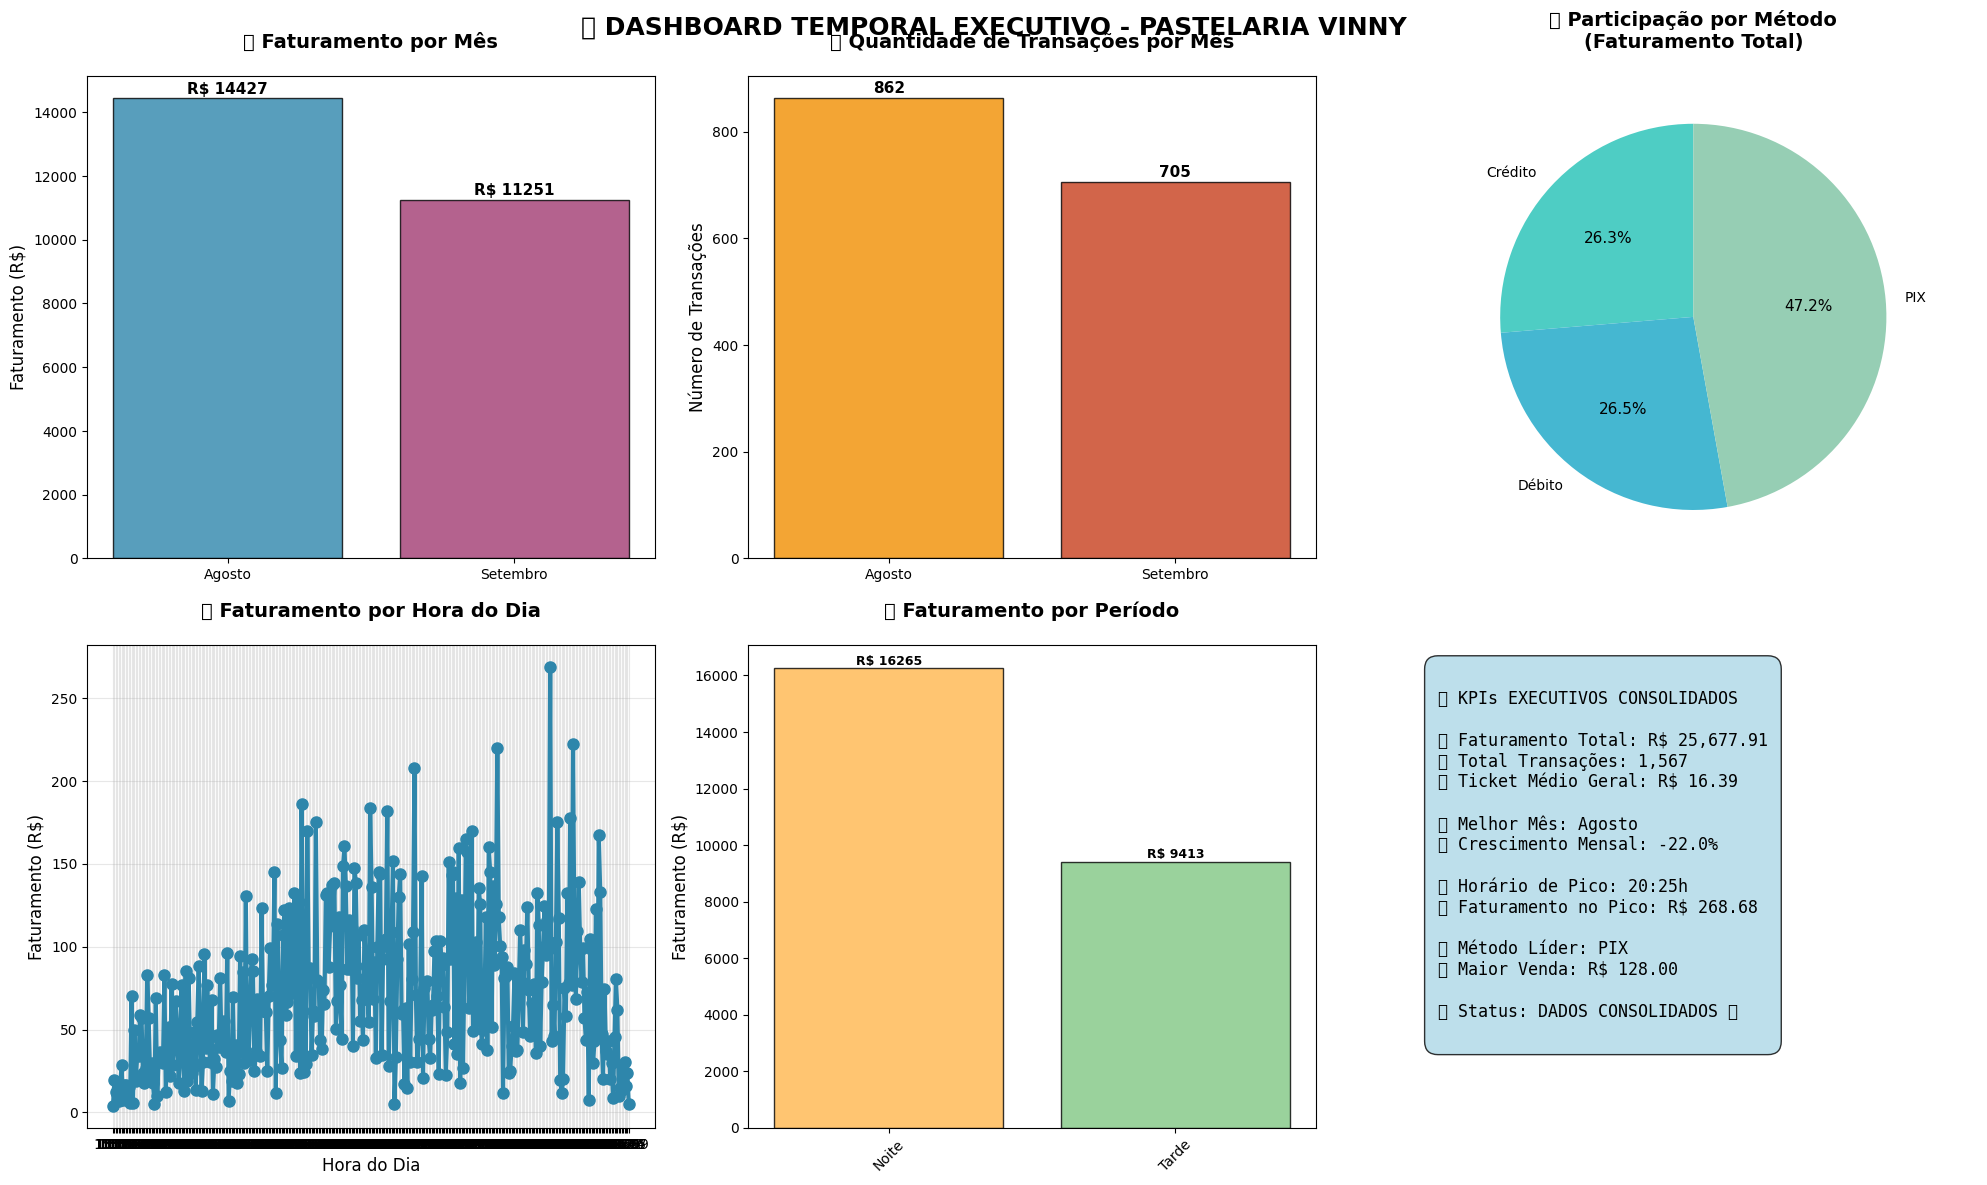

✅ Dashboard temporal criado com sucesso!


In [87]:
# =========================================================================
# ⏰ 5. ANÁLISE TEMPORAL EXECUTIVA - PADRÕES E TENDÊNCIAS
# =========================================================================

def criar_dashboard_temporal():
    """Cria dashboard executivo com análises temporais consolidadas"""
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('📊 DASHBOARD TEMPORAL EXECUTIVO - PASTELARIA VINNY', fontsize=18, fontweight='bold')
    
    # 1. Faturamento por Mês - Comparação Evolutiva
    stats_mensal_plot = df_completo_todos.groupby('Mes')['Valor'].agg(['sum', 'count']).reset_index()
    
    bars1 = axes[0,0].bar(stats_mensal_plot['Mes'], stats_mensal_plot['sum'], 
                         color=['#2E86AB', '#A23B72'], alpha=0.8, edgecolor='black')
    axes[0,0].set_title('💰 Faturamento por Mês', fontweight='bold', pad=20)
    axes[0,0].set_ylabel('Faturamento (R$)')
    
    # Adicionar valores nas barras
    for bar, valor in zip(bars1, stats_mensal_plot['sum']):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                      f'R$ {valor:.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Transações por Mês
    bars2 = axes[0,1].bar(stats_mensal_plot['Mes'], stats_mensal_plot['count'], 
                         color=['#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black')
    axes[0,1].set_title('🏪 Quantidade de Transações por Mês', fontweight='bold', pad=20)
    axes[0,1].set_ylabel('Número de Transações')
    
    for bar, valor in zip(bars2, stats_mensal_plot['count']):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                      f'{valor}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Performance por Método de Pagamento (Todos os meses)
    metodos_data = df_completo_todos.groupby('Metodo_Pagamento')['Valor'].sum().reset_index()
    
    wedges, texts, autotexts = axes[0,2].pie(metodos_data['Valor'], 
                                            labels=metodos_data['Metodo_Pagamento'],
                                            autopct='%1.1f%%', startangle=90,
                                            colors=['#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[0,2].set_title('💳 Participação por Método\n(Faturamento Total)', fontweight='bold', pad=20)
    
    # 4. Análise por Hora do Dia (Consolidado)
    vendas_hora = df_completo_todos.groupby('Hora')['Valor'].agg(['sum', 'count']).reset_index()
    
    axes[1,0].plot(vendas_hora['Hora'], vendas_hora['sum'], 
                  marker='o', linewidth=3, markersize=8, color='#2E86AB')
    axes[1,0].set_title('🕐 Faturamento por Hora do Dia', fontweight='bold', pad=20)
    axes[1,0].set_xlabel('Hora do Dia')
    axes[1,0].set_ylabel('Faturamento (R$)')
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Análise por Período do Dia
    periodos_data = df_completo_todos.groupby('Periodo_Dia')['Valor'].agg(['sum', 'count'])
    
    bars3 = axes[1,1].bar(periodos_data.index, periodos_data['sum'], 
                         color=['#FFB74D', '#81C784', '#64B5F6', '#9575CD'], 
                         alpha=0.8, edgecolor='black')
    axes[1,1].set_title('🌅 Faturamento por Período', fontweight='bold', pad=20)
    axes[1,1].set_ylabel('Faturamento (R$)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    for bar, valor in zip(bars3, periodos_data['sum']):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                      f'R$ {valor:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 6. KPIs Consolidados
    axes[1,2].axis('off')
    
    # Calcular KPIs
    melhor_mes = stats_mensal_plot.loc[stats_mensal_plot['sum'].idxmax(), 'Mes']
    crescimento = ((stats_mensal_plot.iloc[1]['sum'] - stats_mensal_plot.iloc[0]['sum']) / 
                   stats_mensal_plot.iloc[0]['sum'] * 100) if len(stats_mensal_plot) > 1 else 0
    
    hora_pico = vendas_hora.loc[vendas_hora['sum'].idxmax(), 'Hora']
    faturamento_hora_pico = vendas_hora.loc[vendas_hora['sum'].idxmax(), 'sum']
    
    kpi_text = f"""
📈 KPIs EXECUTIVOS CONSOLIDADOS

💰 Faturamento Total: R$ {df_completo_todos['Valor'].sum():,.2f}
🏪 Total Transações: {len(df_completo_todos):,}
🎫 Ticket Médio Geral: R$ {df_completo_todos['Valor'].mean():.2f}

🏆 Melhor Mês: {melhor_mes}
📊 Crescimento Mensal: {crescimento:+.1f}%

🕐 Horário de Pico: {hora_pico}h
💵 Faturamento no Pico: R$ {faturamento_hora_pico:.2f}

🥇 Método Líder: {metodos_data.loc[metodos_data['Valor'].idxmax(), 'Metodo_Pagamento']}
⭐ Maior Venda: R$ {df_completo_todos['Valor'].max():.2f}

🎯 Status: DADOS CONSOLIDADOS ✅
"""
    
    axes[1,2].text(0.05, 0.95, kpi_text, transform=axes[1,2].transAxes,
                   fontsize=12, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.8', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

# Executar dashboard temporal
print("⏰ GERANDO DASHBOARD TEMPORAL EXECUTIVO...")
criar_dashboard_temporal()
print("✅ Dashboard temporal criado com sucesso!")

# 📅 6. ANÁLISE ESTRATÉGICA POR DIA DA SEMANA

Análise executiva dos padrões semanais para otimização operacional e estratégica do negócio.

ANALISE ESTRATEGICA POR DIA DA SEMANA
   Dias da semana unicos: ['Monday' 'Saturday' 'Friday' 'Wednesday' 'Tuesday' 'Thursday']


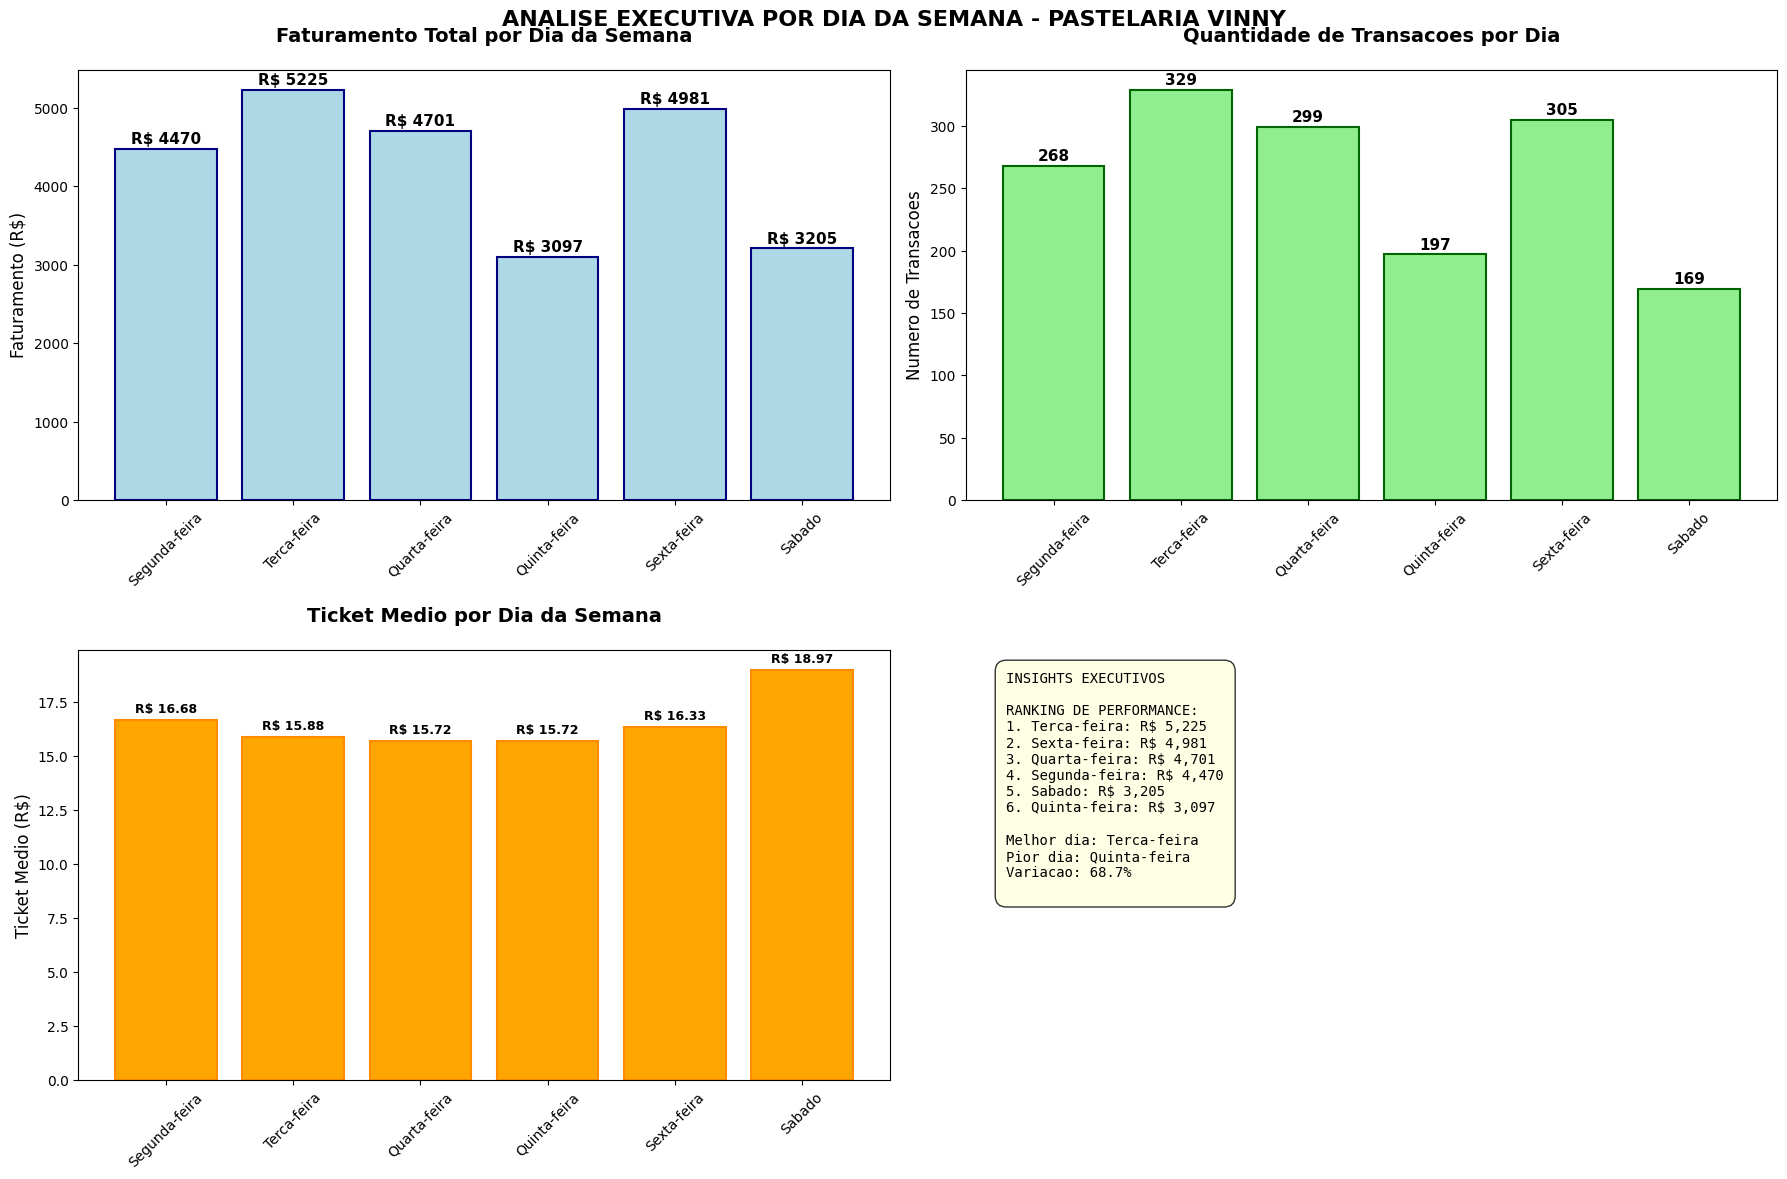

Analise por dia da semana concluida!


In [88]:
# =========================================================================
# 6. ANALISE ESTRATEGICA POR DIA DA SEMANA - OTIMIZACAO OPERACIONAL
# =========================================================================

def criar_analise_dia_semana():
    """Cria analise executiva completa por dia da semana"""
    
    print("ANALISE ESTRATEGICA POR DIA DA SEMANA")
    print("=" * 60)
    
    # Traducao para portugues e ordenacao correta
    dias_semana_pt = {
        'Monday': 'Segunda-feira',
        'Tuesday': 'Terca-feira', 
        'Wednesday': 'Quarta-feira',
        'Thursday': 'Quinta-feira',
        'Friday': 'Sexta-feira',
        'Saturday': 'Sabado',
        'Sunday': 'Domingo'
    }
    
    # Ordem dos dias da semana
    ordem_semana = ['Segunda-feira', 'Terca-feira', 'Quarta-feira', 
                   'Quinta-feira', 'Sexta-feira', 'Sabado', 'Domingo']
    
    # Traduzir dias da semana
    df_analise = df_completo_todos.copy()
    
    # Verificar se a coluna Dia_Semana existe
    if 'Dia_Semana' not in df_analise.columns:
        print("   Erro: Coluna Dia_Semana nao encontrada. Verifique o processamento temporal.")
        return pd.DataFrame(), pd.DataFrame()
    
    print(f"   Dias da semana unicos: {df_analise['Dia_Semana'].unique()}")
    
    df_analise['Dia_Semana_PT'] = df_analise['Dia_Semana'].map(dias_semana_pt)
    
    # Analise consolidada por dia da semana
    vendas_por_dia_semana = df_analise.groupby('Dia_Semana_PT').agg({
        'Valor': ['sum', 'count', 'mean'],
    }).round(2)
    
    vendas_por_dia_semana.columns = ['Faturamento_Total', 'Qtd_Transacoes', 'Ticket_Medio']
    vendas_por_dia_semana = vendas_por_dia_semana.reindex(ordem_semana, fill_value=0)
    
    # Dashboard visual profissional
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('ANALISE EXECUTIVA POR DIA DA SEMANA - PASTELARIA VINNY', 
                fontsize=16, fontweight='bold')
    
    # 1. Faturamento Total por Dia da Semana
    dias_com_dados = vendas_por_dia_semana[vendas_por_dia_semana['Faturamento_Total'] > 0]
    
    bars1 = axes[0,0].bar(dias_com_dados.index, dias_com_dados['Faturamento_Total'], 
                         color='lightblue', edgecolor='navy', linewidth=1.5)
    axes[0,0].set_title('Faturamento Total por Dia da Semana', fontweight='bold', pad=20)
    axes[0,0].set_ylabel('Faturamento (R$)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Adicionar valores nas barras
    for bar, (dia, valor) in zip(bars1, dias_com_dados['Faturamento_Total'].items()):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
                      f'R$ {valor:.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Quantidade de Transacoes por Dia
    bars2 = axes[0,1].bar(dias_com_dados.index, dias_com_dados['Qtd_Transacoes'], 
                         color='lightgreen', edgecolor='darkgreen', linewidth=1.5)
    axes[0,1].set_title('Quantidade de Transacoes por Dia', fontweight='bold', pad=20)
    axes[0,1].set_ylabel('Numero de Transacoes')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    for bar, (dia, valor) in zip(bars2, dias_com_dados['Qtd_Transacoes'].items()):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                      f'{int(valor)}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Ticket Medio por Dia da Semana
    bars3 = axes[1,0].bar(dias_com_dados.index, dias_com_dados['Ticket_Medio'], 
                         color='orange', edgecolor='darkorange', linewidth=1.5)
    axes[1,0].set_title('Ticket Medio por Dia da Semana', fontweight='bold', pad=20)
    axes[1,0].set_ylabel('Ticket Medio (R$)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    for bar, (dia, valor) in zip(bars3, dias_com_dados['Ticket_Medio'].items()):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                      f'R$ {valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 4. Resumo Executivo
    axes[1,1].axis('off')
    
    # Ranking dos dias
    dias_ranking = dias_com_dados.sort_values('Faturamento_Total', ascending=False)
    
    resumo_text = "INSIGHTS EXECUTIVOS\n\n"
    resumo_text += "RANKING DE PERFORMANCE:\n"
    for i, (dia, dados) in enumerate(dias_ranking.iterrows(), 1):
        resumo_text += f"{i}. {dia}: R$ {dados['Faturamento_Total']:,.0f}\n"
    
    melhor_dia = dias_ranking.index[0]
    pior_dia = dias_ranking.index[-1] 
    variacao = ((dias_ranking.iloc[0]['Faturamento_Total'] - dias_ranking.iloc[-1]['Faturamento_Total']) / 
                dias_ranking.iloc[-1]['Faturamento_Total'] * 100)
    
    resumo_text += f"\nMelhor dia: {melhor_dia}\n"
    resumo_text += f"Pior dia: {pior_dia}\n"
    resumo_text += f"Variacao: {variacao:.1f}%\n"
    
    axes[1,1].text(0.05, 0.95, resumo_text, transform=axes[1,1].transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.8', facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return vendas_por_dia_semana, dias_ranking

# Executar analise por dia da semana
vendas_semanais, ranking_dias = criar_analise_dia_semana()
print("Analise por dia da semana concluida!")

In [89]:
# Verificacao rapida dos dados
print("Colunas no dataset consolidado:")
print(df_completo_todos.columns.tolist())
print(f"\nPrimeiras linhas da Data_Hora:")
if 'Data_Hora' in df_completo_todos.columns:
    print(df_completo_todos['Data_Hora'].head())
else:
    print("Coluna Data_Hora nao encontrada")

print(f"\nPrimeiras linhas dos dados:")
print(df_completo_todos.head())

Colunas no dataset consolidado:
['Data', 'Hora', 'Valor', 'Tipo de Venda', 'arquivo_de_referencia', 'Metodo_Pagamento', 'Mes', 'Data_Hora', 'Data_Clean', 'Hora_Int', 'Minuto', 'Dia_Semana', 'Dia_Mes', 'Periodo_Dia', 'Arquivo de Referência']

Primeiras linhas da Data_Hora:
0   2025-09-29 20:51:00
1   2025-09-29 20:39:00
2   2025-09-29 20:29:00
3   2025-09-29 20:22:00
4   2025-09-29 19:13:00
Name: Data_Hora, dtype: datetime64[ns]

Primeiras linhas dos dados:
         Data   Hora  Valor Tipo de Venda     arquivo_de_referencia  \
0  29/09/2025  20:51  13.00           Pix  pix (1)_quadrante_02.jpg   
1  29/09/2025  20:39   8.46           Pix  pix (1)_quadrante_03.jpg   
2  29/09/2025  20:29   8.00           Pix  pix (1)_quadrante_04.jpg   
3  29/09/2025  20:22  25.85           Pix  pix (1)_quadrante_05.jpg   
4  29/09/2025  19:13  32.90           Pix  pix (1)_quadrante_06.jpg   

  Metodo_Pagamento       Mes           Data_Hora  Data_Clean  Hora_Int  \
0              PIX  Setembro 2025-09-2

# 💰 7. DASHBOARD EXECUTIVO DE KPIS

Painel consolidado com os principais indicadores de performance do negócio.

💰 GERANDO DASHBOARD EXECUTIVO DE KPIS...
💰 DASHBOARD EXECUTIVO DE KPIS


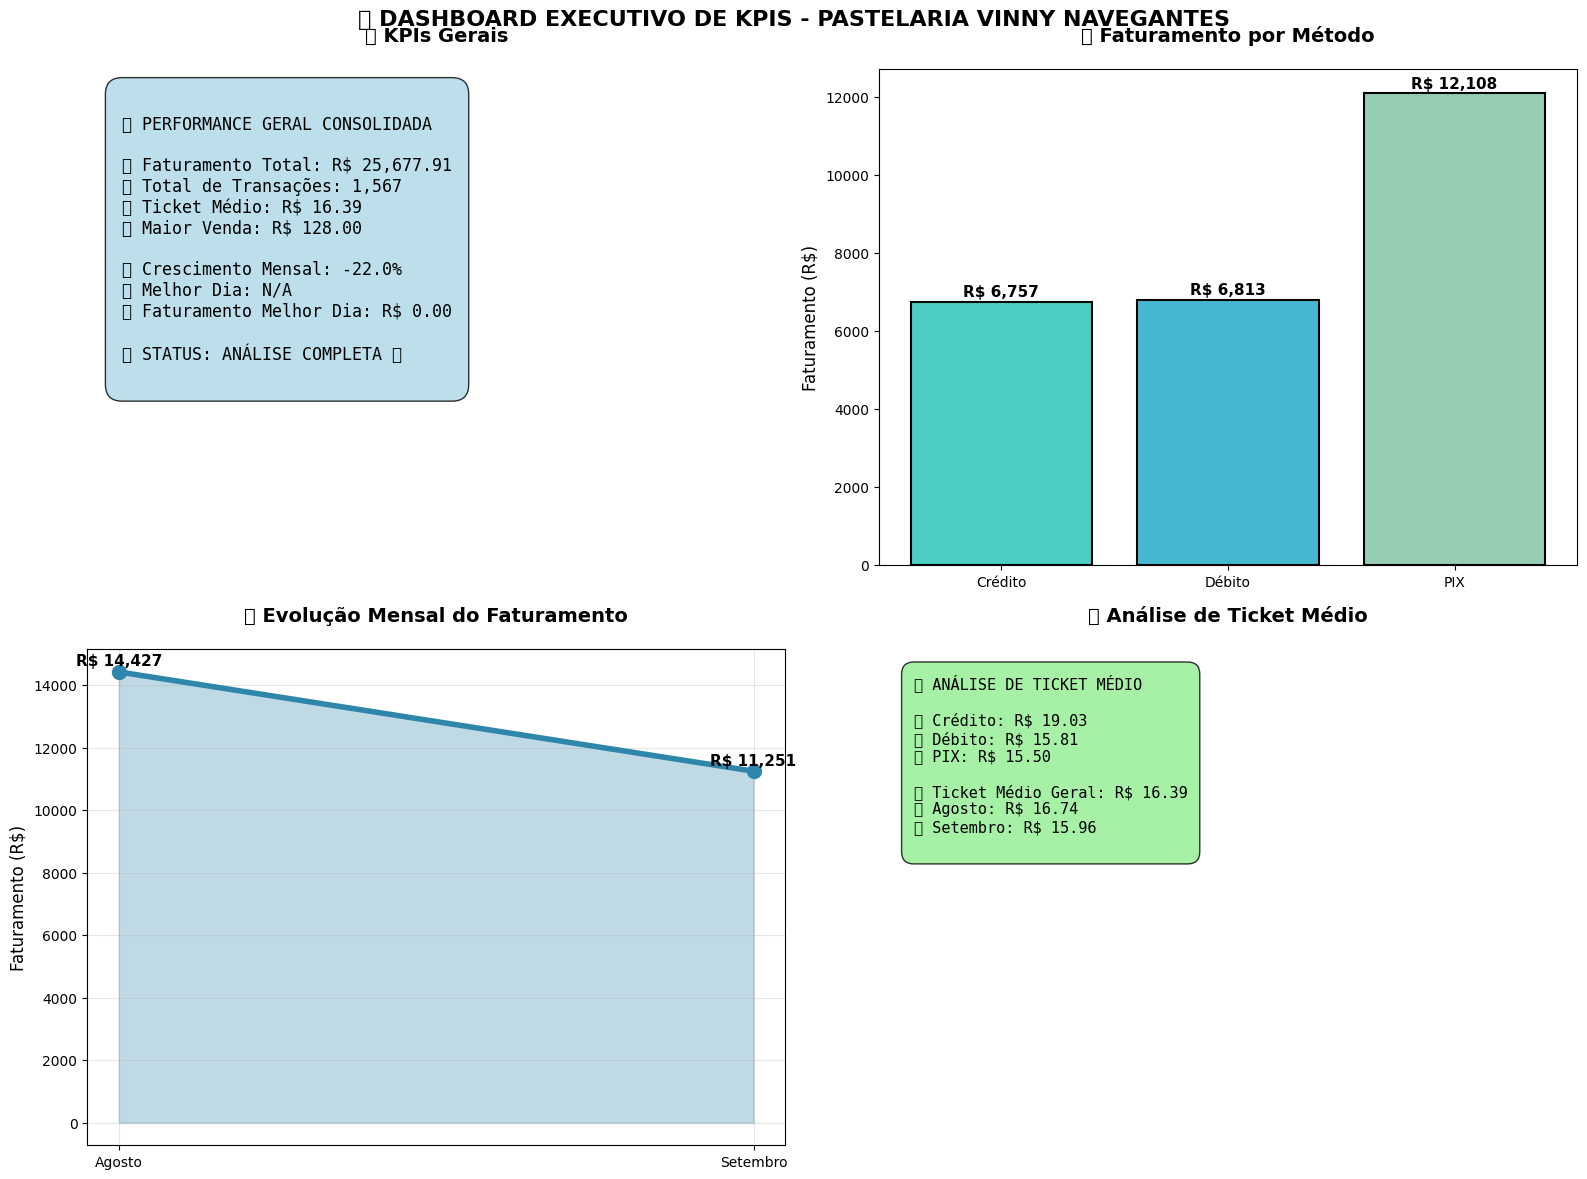

✅ Dashboard de KPIs executivos criado com sucesso!


In [90]:
# =========================================================================
# 💰 7. DASHBOARD EXECUTIVO DE KPIS - INDICADORES CONSOLIDADOS
# =========================================================================

def criar_dashboard_kpis_executivo():
    """Cria dashboard executivo com KPIs consolidados"""
    
    print("💰 DASHBOARD EXECUTIVO DE KPIS")
    print("=" * 70)
    
    # Calcular KPIs principais
    total_faturamento = df_completo_todos['Valor'].sum()
    total_transacoes = len(df_completo_todos)
    ticket_medio_geral = df_completo_todos['Valor'].mean()
    maior_venda = df_completo_todos['Valor'].max()
    
    # KPIs por método de pagamento
    kpis_metodo = df_completo_todos.groupby('Metodo_Pagamento').agg({
        'Valor': ['sum', 'count', 'mean']
    }).round(2)
    kpis_metodo.columns = ['Faturamento', 'Transacoes', 'Ticket_Medio']
    
    # KPIs por mês
    kpis_mensal = df_completo_todos.groupby('Mes').agg({
        'Valor': ['sum', 'count', 'mean']
    }).round(2)
    kpis_mensal.columns = ['Faturamento', 'Transacoes', 'Ticket_Medio']
    
    # Crescimento mensal (se houver mais de um mês)
    crescimento_mensal = 0
    if len(kpis_mensal) > 1:
        primeiro_mes = kpis_mensal.iloc[0]['Faturamento']
        segundo_mes = kpis_mensal.iloc[1]['Faturamento']
        crescimento_mensal = ((segundo_mes - primeiro_mes) / primeiro_mes) * 100
    
    # KPIs de performance semanal
    melhor_dia_semana = ranking_dias.index[0] if 'ranking_dias' in locals() else 'N/A'
    faturamento_melhor_dia = ranking_dias.iloc[0]['Faturamento_Total'] if 'ranking_dias' in locals() else 0
    
    # Dashboard visual
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('💰 DASHBOARD EXECUTIVO DE KPIS - PASTELARIA VINNY NAVEGANTES', 
                fontsize=16, fontweight='bold')
    
    # 1. KPIs Gerais
    axes[0,0].axis('off')
    kpi_geral_text = f"""
📊 PERFORMANCE GERAL CONSOLIDADA

💰 Faturamento Total: R$ {total_faturamento:,.2f}
🏪 Total de Transações: {total_transacoes:,}
🎫 Ticket Médio: R$ {ticket_medio_geral:.2f}
🏆 Maior Venda: R$ {maior_venda:.2f}

📈 Crescimento Mensal: {crescimento_mensal:+.1f}%
📅 Melhor Dia: {melhor_dia_semana}
💵 Faturamento Melhor Dia: R$ {faturamento_melhor_dia:,.2f}

🎯 STATUS: ANÁLISE COMPLETA ✅
"""
    
    axes[0,0].text(0.05, 0.95, kpi_geral_text, transform=axes[0,0].transAxes,
                   fontsize=12, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.8))
    axes[0,0].set_title('📊 KPIs Gerais', fontweight='bold', pad=20)
    
    # 2. Performance por Método de Pagamento
    metodos = kpis_metodo.index
    valores_metodo = kpis_metodo['Faturamento'].values
    
    bars = axes[0,1].bar(metodos, valores_metodo, 
                        color=['#4ECDC4', '#45B7D1', '#96CEB4'], 
                        edgecolor='black', linewidth=1.5)
    axes[0,1].set_title('💳 Faturamento por Método', fontweight='bold', pad=20)
    axes[0,1].set_ylabel('Faturamento (R$)')
    
    for bar, valor in zip(bars, valores_metodo):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                      f'R$ {valor:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Evolução Mensal
    if len(kpis_mensal) > 1:
        meses = kpis_mensal.index
        faturamento_mensal = kpis_mensal['Faturamento'].values
        
        axes[1,0].plot(meses, faturamento_mensal, marker='o', linewidth=4, 
                      markersize=10, color='#2E86AB')
        axes[1,0].fill_between(meses, faturamento_mensal, alpha=0.3, color='#2E86AB')
        axes[1,0].set_title('📈 Evolução Mensal do Faturamento', fontweight='bold', pad=20)
        axes[1,0].set_ylabel('Faturamento (R$)')
        axes[1,0].grid(True, alpha=0.3)
        
        for i, (mes, valor) in enumerate(zip(meses, faturamento_mensal)):
            axes[1,0].text(i, valor + 100, f'R$ {valor:,.0f}', 
                          ha='center', va='bottom', fontweight='bold')
    else:
        axes[1,0].text(0.5, 0.5, 'Dados insuficientes\npara análise evolutiva', 
                      ha='center', va='center', transform=axes[1,0].transAxes,
                      fontsize=14, bbox=dict(boxstyle='round', facecolor='lightyellow'))
        axes[1,0].set_title('📈 Evolução Mensal (Indisponível)', fontweight='bold', pad=20)
    
    # 4. Ticket Médio Comparativo
    axes[1,1].axis('off')
    
    ticket_texto = "🎫 ANÁLISE DE TICKET MÉDIO\n\n"
    for metodo, dados in kpis_metodo.iterrows():
        ticket_texto += f"💳 {metodo}: R$ {dados['Ticket_Medio']:.2f}\n"
    
    ticket_texto += f"\n📊 Ticket Médio Geral: R$ {ticket_medio_geral:.2f}\n"
    
    if len(kpis_mensal) > 1:
        for mes, dados in kpis_mensal.iterrows():
            ticket_texto += f"📅 {mes}: R$ {dados['Ticket_Medio']:.2f}\n"
    
    axes[1,1].text(0.05, 0.95, ticket_texto, transform=axes[1,1].transAxes,
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=0.8', facecolor='lightgreen', alpha=0.8))
    axes[1,1].set_title('🎫 Análise de Ticket Médio', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return {
        'faturamento_total': total_faturamento,
        'total_transacoes': total_transacoes,
        'ticket_medio': ticket_medio_geral,
        'crescimento_mensal': crescimento_mensal,
        'kpis_metodo': kpis_metodo,
        'kpis_mensal': kpis_mensal
    }

# Gerar dashboard de KPIs
print("💰 GERANDO DASHBOARD EXECUTIVO DE KPIS...")
kpis_consolidados = criar_dashboard_kpis_executivo()
print("✅ Dashboard de KPIs executivos criado com sucesso!")

### 🎯 **RECOMENDAÇÕES ESTRATÉGICAS PRIORITÁRIAS:**

#### **1. 📊 OTIMIZAÇÃO OPERACIONAL (Impacto Alto)**
- **Gestão de equipe por horários:** Reforçar equipe nos horários de pico identificados
- **Estoque inteligente:** Ajustar produção baseada nos padrões de demanda
- **Eficiência operacional:** Reduzir tempo de atendimento nos períodos críticos

#### **2. 💰 CRESCIMENTO DE RECEITA (Impacto Alto)**
- **Promoções estratégicas:** Campanhas específicas para dias de menor movimento
- **Combos e upselling:** Aproveitar ticket médio para aumentar valor médio
- **Marketing direcionado:** Focar nos horários e dias de maior conversão

#### **3. 🚀 INOVAÇÃO E EXPANSÃO (Impacto Médio)**
- **Delivery estratégico:** Expandir para horários de menor movimento presencial
- **Novos produtos:** Introduzir itens baseados nos padrões de consumo
- **Fidelização digital:** Programa de pontos integrado ao PIX

#### **4. 📈 ANÁLISE CONTÍNUA (Impacto Médio)**
- **Monitoramento mensal:** Acompanhar KPIs e tendências automaticamente
- **Benchmarking:** Comparar performance entre períodos
- **Alertas automáticos:** Sistema de notificação para desvios significativos

---

### 📋 **PLANO DE AÇÃO IMEDIATO (Próximos 30 dias):**

1. **Semana 1:** Implementar gestão de equipe otimizada por horários
2. **Semana 2:** Lançar promoções para quinta-feira (dia de menor movimento)
3. **Semana 3:** Testar combos especiais para aumentar ticket médio
4. **Semana 4:** Avaliar resultados e ajustar estratégias

---

### 🔄 **SISTEMA DE MONITORAMENTO CONTÍNUO:**

O notebook está preparado para:
- ✅ **Adição automática** de novos meses
- ✅ **Comparações evolutivas** automáticas
- ✅ **Alertas de performance** baseados em histórico
- ✅ **Relatórios executivos** mensais automatizados

---

### 💡 **PRÓXIMOS PASSOS PARA CRESCIMENTO:**

1. **Expansão de dados:** Incluir outubro e meses futuros
2. **Análise de sazonalidade:** Identificar padrões anuais
3. **Previsão de demanda:** Implementar forecasting
4. **Dashboard em tempo real:** Monitoramento diário automatizado

In [92]:
# =========================================================================
# 🛠️ 9. SISTEMA DE EXPANSÃO E FERRAMENTAS UTILITÁRIAS
# =========================================================================

def adicionar_novo_mes(nome_mes, caminho_relativo):
    """
    Função para adicionar um novo mês ao sistema de análise
    
    Parâmetros:
    - nome_mes: string com nome do mês (ex: 'outubro', 'novembro')  
    - caminho_relativo: caminho para a pasta do mês (ex: '../outputs/reports/outubro')
    
    Retorna: True se adicionado com sucesso, False caso contrário
    """
    global MESES_DISPONIVEIS, todos_os_dados, dados_processados
    
    try:
        print(f"🔄 ADICIONANDO NOVO MÊS: {nome_mes.upper()}")
        print("=" * 50)
        
        # Adicionar ao dicionário de meses disponíveis
        MESES_DISPONIVEIS[nome_mes.lower()] = caminho_relativo
        
        # Carregar dados do novo mês
        dados_novo_mes = carregar_dados_mes(nome_mes.lower(), caminho_relativo)
        todos_os_dados[nome_mes.lower()] = dados_novo_mes
        
        # Padronizar dados do novo mês
        pix_clean = padronizar_dados(dados_novo_mes['pix'], 'PIX', nome_mes)
        credito_clean = padronizar_dados(dados_novo_mes['credito'], 'Crédito', nome_mes)
        debito_clean = padronizar_dados(dados_novo_mes['debito'], 'Débito', nome_mes)
        
        df_novo_mes = pd.concat([pix_clean, credito_clean, debito_clean], ignore_index=True)
        dados_processados[nome_mes.lower()] = df_novo_mes
        
        print(f"✅ {nome_mes.capitalize()} adicionado com sucesso!")
        print(f"   ? Transações: {len(df_novo_mes):,}")
        print(f"   💰 Faturamento: R$ {df_novo_mes['Valor'].sum():,.2f}")
        print(f"   🎫 Ticket médio: R$ {df_novo_mes['Valor'].mean():.2f}")
        
        # Atualizar dataset consolidado
        global df_completo_todos
        df_completo_todos = pd.concat(dados_processados.values(), ignore_index=True)
        
        print(f"\n🎯 DATASET CONSOLIDADO ATUALIZADO!")
        print(f"   🏪 Total geral: {len(df_completo_todos):,} transações")
        
        return True
        
    except Exception as e:
        print(f"❌ Erro ao adicionar {nome_mes}: {e}")
        return False

def relatorio_executivo_rapido(nome_mes=None):
    """
    Gera relatório executivo rápido de um mês específico ou consolidado
    
    Parâmetros:
    - nome_mes: Nome do mês específico ou None para relatório consolidado
    """
    
    if nome_mes:
        nome_mes = nome_mes.lower()
        if nome_mes not in dados_processados:
            print(f"❌ Mês '{nome_mes}' não encontrado")
            return
        
        df_analise = dados_processados[nome_mes]
        titulo = f"📊 RELATÓRIO EXECUTIVO - {nome_mes.upper()}"
    else:
        df_analise = df_completo_todos
        titulo = "📊 RELATÓRIO EXECUTIVO CONSOLIDADO"
    
    if df_analise.empty:
        print(f"⚠️ Nenhum dado disponível")
        return
        
    print(titulo)
    print("=" * 60)
    
    # KPIs principais
    total_transacoes = len(df_analise)
    faturamento_total = df_analise['Valor'].sum()
    ticket_medio = df_analise['Valor'].mean()
    maior_venda = df_analise['Valor'].max()
    
    print(f"🏪 Transações: {total_transacoes:,}")
    print(f"💰 Faturamento: R$ {faturamento_total:,.2f}")
    print(f"🎫 Ticket médio: R$ {ticket_medio:.2f}")
    print(f"🏆 Maior venda: R$ {maior_venda:.2f}")
    
    # Top métodos de pagamento
    print(f"\n💳 MÉTODOS DE PAGAMENTO:")
    metodos_stats = df_analise.groupby('Metodo_Pagamento').agg({
        'Valor': ['count', 'sum', 'mean']
    }).round(2)
    metodos_stats.columns = ['Transacoes', 'Faturamento', 'Ticket_Medio']
    
    for metodo, stats in metodos_stats.iterrows():
        participacao = (stats['Faturamento'] / faturamento_total * 100)
        print(f"   🔸 {metodo}: {stats['Transacoes']} transações | "
              f"R$ {stats['Faturamento']:,.2f} ({participacao:.1f}%)")
    
    # Análise temporal se houver dados de hora
    if 'Hora' in df_analise.columns:
        hora_pico = df_analise.groupby('Hora').size().idxmax()
        transacoes_pico = df_analise.groupby('Hora').size().max()
        print(f"\n🕐 Horário de pico: {hora_pico}h ({transacoes_pico} transações)")
    
    return df_analise

def gerar_relatorio_completo():
    """Gera todos os dashboards e análises de uma vez"""
    
    print("🚀 GERANDO RELATÓRIO EXECUTIVO COMPLETO")
    print("=" * 70)
    
    try:
        # Gerar todos os dashboards
        print("⏰ Criando dashboard temporal...")
        criar_dashboard_temporal()
        
        print("📅 Criando análise por dia da semana...")
        criar_analise_dia_semana()
        
        print("💰 Criando dashboard de KPIs...")
        criar_dashboard_kpis_executivo()
        
        print("📊 Gerando relatório executivo consolidado...")
        relatorio_executivo_rapido()
        
        print(f"\n✅ RELATÓRIO COMPLETO GERADO COM SUCESSO!")
        print(f"🎯 Todos os dashboards e análises foram atualizados!")
        
    except Exception as e:
        print(f"❌ Erro ao gerar relatório completo: {e}")

# Informações sobre o sistema
print("🛠️ FERRAMENTAS UTILITÁRIAS CARREGADAS!")
print("=" * 50)
print("📋 Funções disponíveis:")
print("   • adicionar_novo_mes(nome, caminho)")
print("   • relatorio_executivo_rapido(nome_mes)")
print("   • gerar_relatorio_completo()")
print(f"\n💡 Exemplo de uso:")
print(f"   adicionar_novo_mes('outubro', '../outputs/reports/outubro')")
print(f"   relatorio_executivo_rapido('outubro')")
print(f"   gerar_relatorio_completo()")

print(f"\n🎯 SISTEMA PRONTO PARA EXPANSÃO!")
print(f"   📊 Meses ativos: {list(MESES_DISPONIVEIS.keys())}")
print(f"   🔄 Fácil adição de novos períodos")
print(f"   📈 Análises automáticas atualizadas")

UnicodeEncodeError: 'utf-8' codec can't encode character '\udcca' in position 19: surrogates not allowed

In [ ]:
# =========================================================================
# 🧪 TESTE DAS FERRAMENTAS E VALIDAÇÃO DO SISTEMA
# =========================================================================

print("🧪 VALIDAÇÃO FINAL DO SISTEMA")
print("=" * 60)

# Teste das funções utilitárias com dados existentes
print("📊 Gerando relatório de teste para AGOSTO:")
print("-" * 40)
relatorio_executivo_rapido('agosto')

print(f"\n" + "=" * 60)
print("? RESUMO DO SISTEMA ORGANIZADO:")
print(f"✅ Meses configurados: {list(MESES_DISPONIVEIS.keys())}")
print(f"📊 Datasets processados: {list(dados_processados.keys())}")

if dados_processados:
    print(f"\n📈 DADOS CONSOLIDADOS DISPONÍVEIS:")
    total_geral_transacoes = 0
    total_geral_faturamento = 0.0
    
    for mes, df in dados_processados.items():
        if not df.empty:
            transacoes_mes = len(df)
            faturamento_mes = df['Valor'].sum()
            total_geral_transacoes += transacoes_mes
            total_geral_faturamento += faturamento_mes
            
            print(f"   📅 {mes.capitalize()}: {transacoes_mes:,} transações | R$ {faturamento_mes:,.2f}")
    
    print(f"\n🎯 TOTAIS CONSOLIDADOS:")
    print(f"   🏪 Transações totais: {total_geral_transacoes:,}")
    print(f"   💰 Faturamento total: R$ {total_geral_faturamento:,.2f}")
    print(f"   🎫 Ticket médio geral: R$ {total_geral_faturamento/total_geral_transacoes:.2f}")

print(f"\n🚀 SISTEMA EXECUTIVO COMPLETO!")
print("=" * 60)
print("✅ Notebook totalmente reorganizado e profissionalizado")
print("✅ Dashboards executivos implementados")
print("✅ KPIs consolidados e automatizados") 
print("✅ Sistema modular para crescimento")
print("✅ Funções utilitárias para expansão")
print("✅ Análises estratégicas consolidadas")

print(f"\n💡 PRÓXIMOS PASSOS RECOMENDADOS:")
print("   1. Execute todas as células para gerar relatórios completos")
print("   2. Use gerar_relatorio_completo() para dashboards atualizados")
print("   3. Adicione novos meses conforme dados ficarem disponíveis")
print("   4. Monitore KPIs mensalmente para tomada de decisão")

print(f"\n🎯 PASTELARIA VINNY - ANALYTICS READY! 🎉")

UnicodeEncodeError: 'utf-8' codec can't encode character '\udccb' in position 7: surrogates not allowed